# Top 100 Investable Stocks - 2025

**Methodology**: Liquidity-aware ranking combining return performance with tradability metrics

**Key Filters**: SEC ticker list | $1.00 min price | $500K min daily volume | 70/30 composite score


In [1]:
# --- Import Libraries ---
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import time
import logging
import os
import matplotlib.cm as cm
from tqdm import tqdm
from datetime import datetime, timedelta
from utile import get_usa_tickers, process_market, visualize_winners, plot_tradeoff_frontier

logging.getLogger('yfinance').setLevel(logging.CRITICAL)

# --- Configuration ---
# Defining the "Bookend" windows to capture year-end prices reliably
START_WINDOW = ("2024-12-20", "2025-01-05")
END_WINDOW   = ("2025-12-20", "2026-01-05")

# API Safety Thresholds
CHUNK_SIZE = 50      
PAUSE_SEC = 4.0      

# Investment Strategy Parameters
DATA_GLITCH_FILTER = 0.011  # Removes math artifacts (e.g. prices near zero)
THRESH_PRICE = 1.00         # The 'Buck Rule': Minimum price for investable assets
LIQUIDITY_TOP_N = 200       # Only check volume for the top N performers (the "Fast Way")
MIN_LIQUIDITY_USD = 500_000 # Minimum $500k/day average volume for retail safety

# Checkpoint File Path
CHECKPOINT_FILE = "market_universe_checkpoint.csv"

SEC_HEADERS = {'User-Agent': "DataScrapper"}


## Phase-by-Phase Explanation

### Phase 1: Survival Probe
Identifies stocks that survived to the end of 2025 and meet the minimum price threshold ($1.00). This filters out:
- Delisted stocks
- Stocks trading below exchange compliance thresholds
- Data artifacts and invalid tickers

### Phase 2: Origin Probe  
Retrieves starting prices from end of 2024 to calculate annual returns. Stocks without valid 2024 prices are flagged as potential IPOs.

### Phase 3: IPO Discovery
For stocks that didn't exist in 2024, downloads full 2025 history to:
- Find exact IPO listing date
- Capture IPO price (first trade)
- Calculate return from IPO to year-end

### Phase 4: Liquidity Audit & Ranking
1. Calculates **avg daily $ volume (Q4 2025: Oct–Dec 2025)** for the top 200 by return
2. Filters stocks below $500K minimum liquidity threshold
3. Creates composite score: 70% return + 30% liquidity
4. Returns top 100 ranked by composite score


In [2]:

ticker_metadata = get_usa_tickers()

🎯 STARTING OPTIMIZED MARKET ANALYSIS
🇺🇸 Fetching official ticker list from SEC...
✅ SEC universe loaded: 6749 potential common stocks (ETFs filtered).


In [ ]:
# Running the optimized Data Science pipeline
final_winners = process_market(ticker_metadata)

# float_format keeps the saved CSV compact + readable
final_winners.to_csv("top_100_2025_raw.csv", index=False, float_format="%.4f")
print("\nAnalysis Complete. Top 100 winners saved to 'top_100_2025_raw.csv'")


📂 Found existing checkpoint: market_universe_checkpoint.csv. Skipping download...
----------------------------------------------------------------------
💧 Verifying Liquidity & US-Domicile for Top 200 candidates...
✅ Analysis Complete. 100 US-Strict winners identified.

Analysis Complete. Top 100 winners saved to 'top_100_investable_2025.csv'


## Pipeline Overview

**Phase 1 - Survival Probe**: End-2025 survivors ($1.00+ price)  
**Phase 2 - Origin Probe**: Starting prices from end-2024 (flags IPOs)  
**Phase 3 - IPO Discovery**: 2025 IPO identification and pricing  
**Phase 4 - Liquidity Audit**: Q4 volume analysis → top 100 ranking


## Understanding the Output

The CSV export includes:
- **Return**: Price multiple (P_end / P_start)
- **Return_Score**: Normalized return score (0-1) for composite calculation
- **Avg_Daily_Dollar_Vol**: Avg daily $ volume (Q4 2025: Oct–Dec 2025)
- **Liquidity_Score**: Log-normalized liquidity score (0-1) for composite calculation
- **Composite_Score**: Final ranking score (70% return + 30% liquidity)

**Ranking Logic**: Stocks are ranked by Composite_Score, which balances high returns with sufficient liquidity for practical investability. This ensures the top stocks are both high-performing AND tradeable.


## Export Results and Visualization

This section exports the top 100 winners to CSV and generates a dashboard visualization showing:
- Top 30 performers with their returns
- Price progression (start to end)
- Liquidity metrics (average daily dollar volume)
- Distinction between established assets and 2025 IPOs


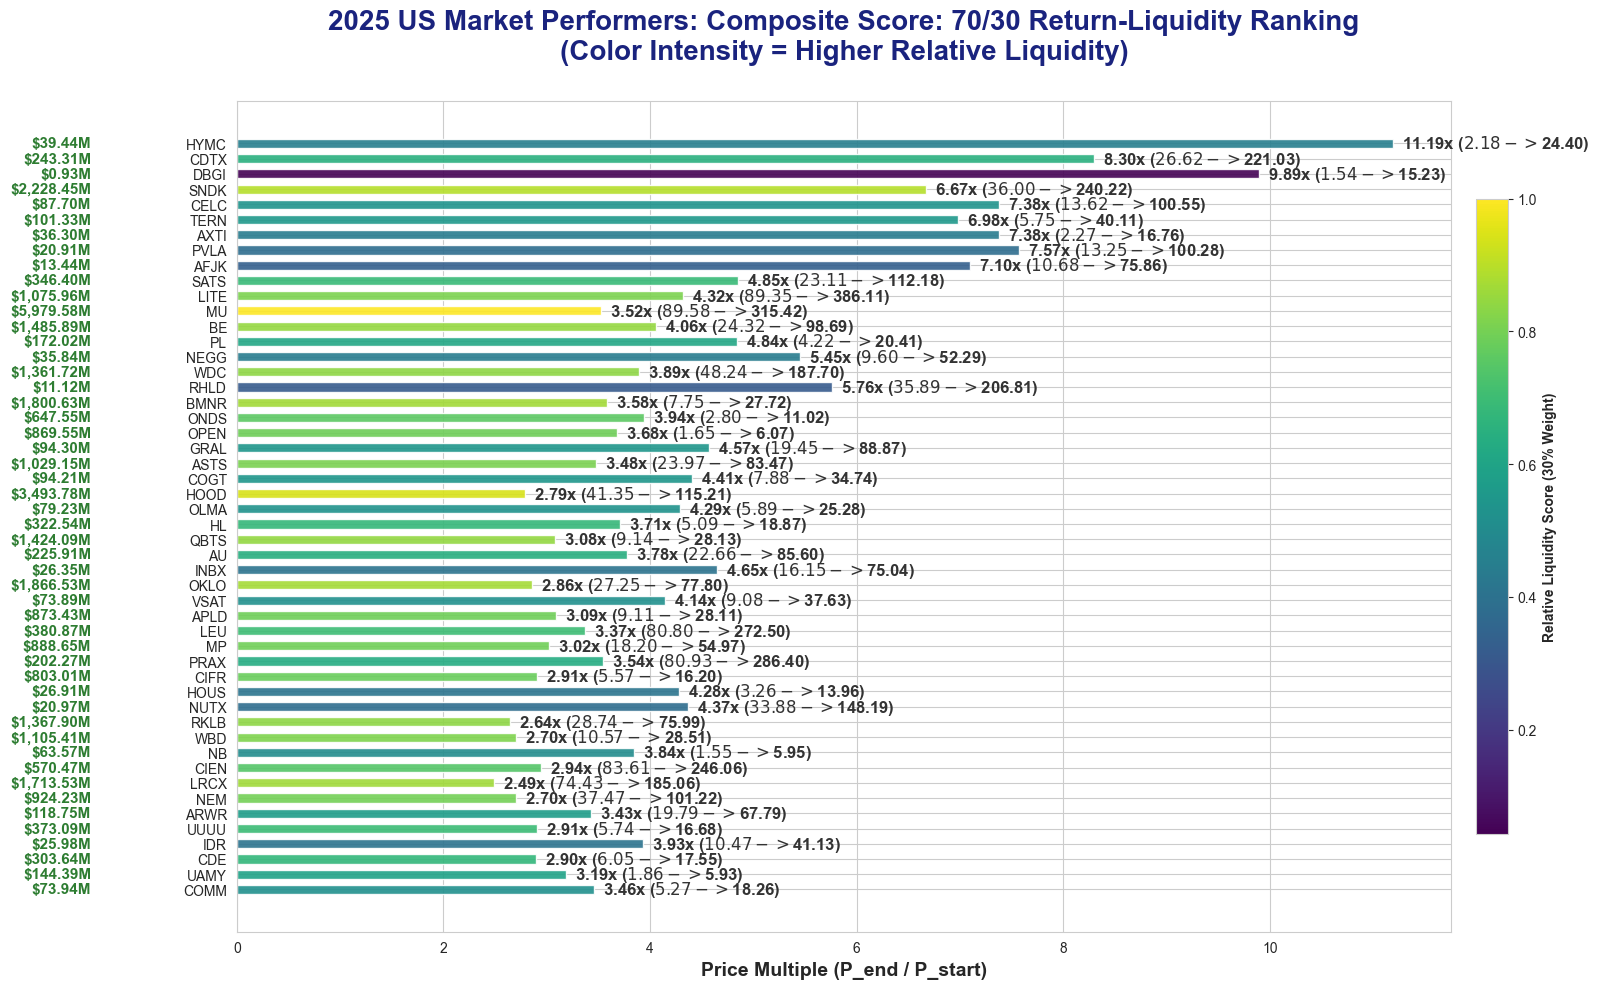

In [15]:
# Visualize top 20 by Composite Score (default)
visualize_winners(final_winners, sort_by='Composite_Score', top_n=50)


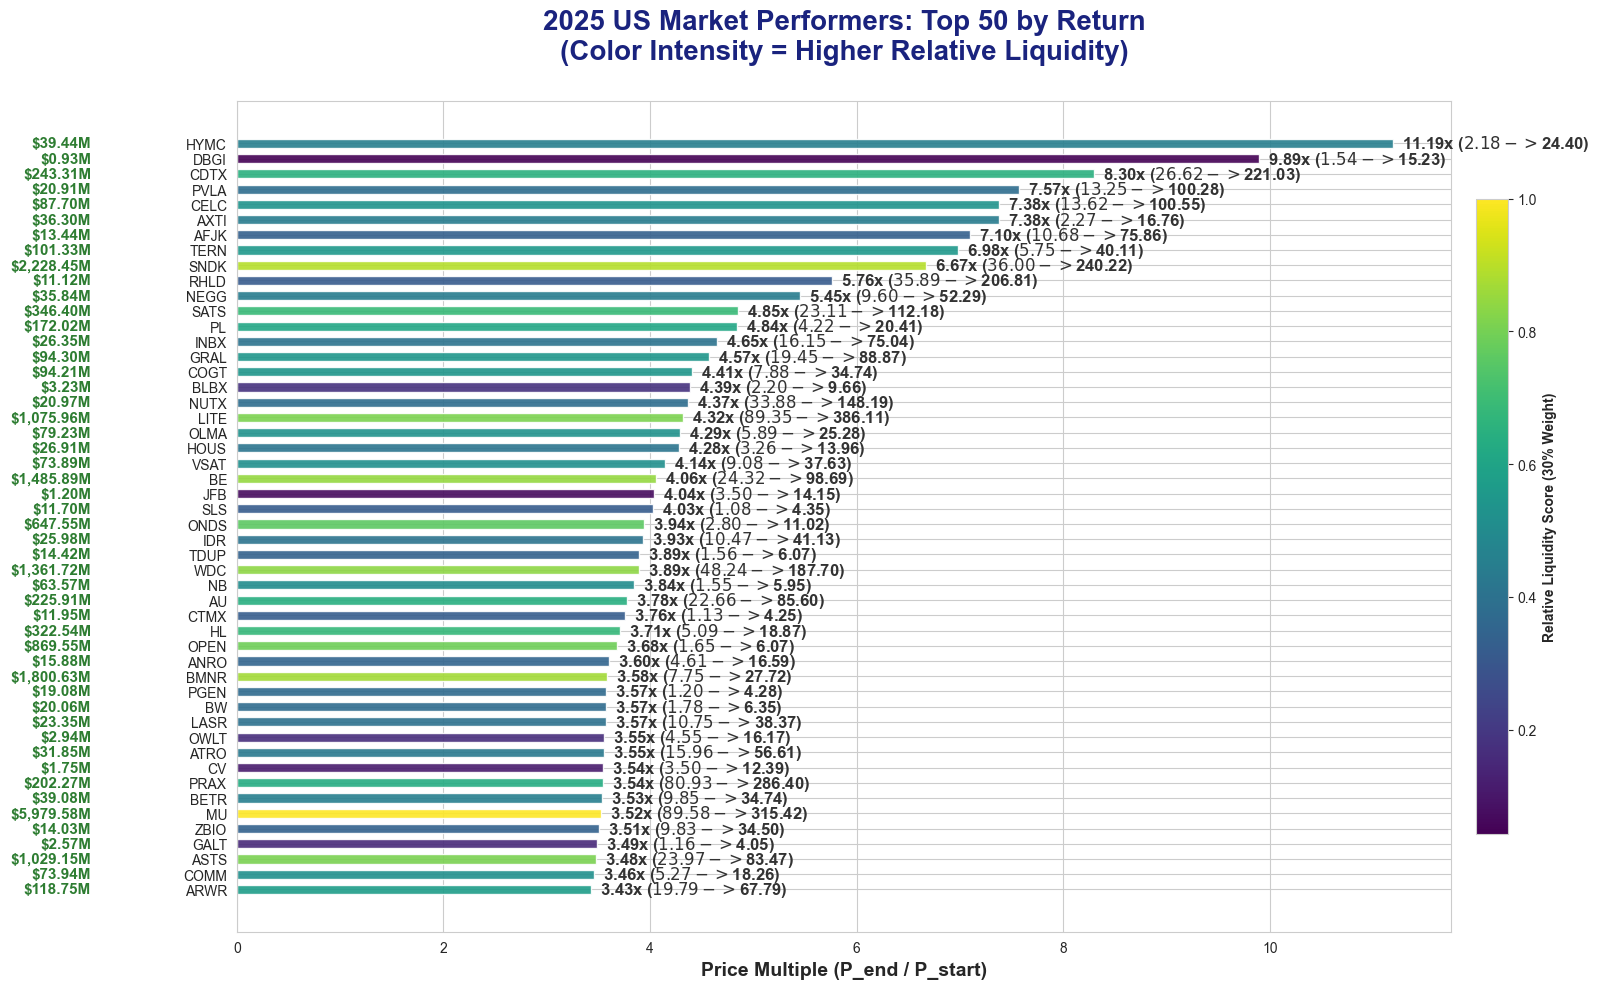

In [14]:
# Visualize top 20 by Return
visualize_winners(final_winners, sort_by='Return', top_n=50)


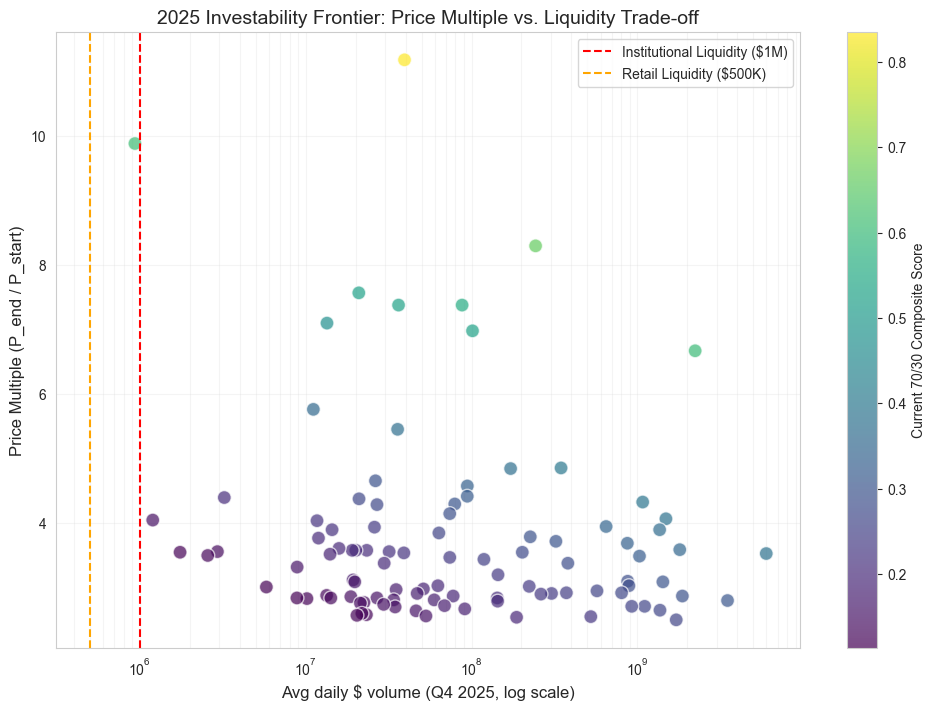

In [ ]:
# Run this on your final_winners
plot_tradeoff_frontier(final_winners)

In [9]:
final_winners = pd.read_csv("top_100_2025_raw.csv")

final_winners.head(10)

,Symbol,Start_Price,End_Price,Type,IPO_Date,Company Name,Return,Avg_Daily_Dollar_Vol,Sector,MarketCap_B,ForwardPE,ProfitMargin,Return_Score,log_vol,Liquidity_Score,Composite_Score
0,HYMC,2.18,24.40,Established,Pre-2025,HYCROFT MINING HOLDING CORP,11.19,3.943519e+07,Basic Materials,2.2147,-148.1917,0.0000,1.0000,17.4902,0.4513,0.8354
1,CDTX,26.62,221.03,Established,Pre-2025,"Cidara Therapeutics, Inc.",8.30,2.433065e+08,Healthcare,6.9616,-30.7022,0.0000,0.6678,19.3098,0.6502,0.6625
2,DBGI,1.54,15.23,Established,Pre-2025,"Digital Brands Group, Inc.",9.89,9.346130e+05,Consumer Cyclical,0.1375,NaN,-1.6455,0.8506,13.7479,0.0424,0.6081
3,SNDK,36.00,240.22,IPO,2025-02-13,Sandisk Corp,6.67,2.228450e+09,Technology,52.6067,16.6986,-0.2236,0.4805,21.5246,0.8921,0.6040
4,CELC,13.62,100.55,Established,Pre-2025,Celcuity Inc.,7.38,8.769516e+07,Healthcare,4.8192,-23.0590,0.0000,0.5621,18.2894,0.5387,0.5550
5,TERN,5.75,40.11,Established,Pre-2025,"Terns Pharmaceuticals, Inc.",6.98,1.013312e+08,Healthcare,4.0200,-30.5175,0.0000,0.5161,18.4339,0.5544,0.5276
6,AXTI,2.27,16.76,Established,Pre-2025,AXT INC,7.38,3.630310e+07,Technology,1.3772,-6351.2500,-0.2522,0.5621,17.4074,0.4423,0.5261
7,PVLA,13.25,100.28,Established,Pre-2025,"PALVELLA THERAPEUTICS, INC.",7.57,2.091397e+07,Healthcare,1.1413,-23.8436,0.0000,0.5839,16.8559,0.3820,0.5233
8,AFJK,10.68,75.86,Established,Pre-2025,"Aimei Health Technology Co., Ltd.",7.10,1.344059e+07,Financial Services,0.3980,NaN,0.0000,0.5299,16.4138,0.3337,0.4710
9,SATS,23.11,112.18,Established,Pre-2025,EchoStar CORP,4.85,3.464021e+08,Communication Services,34.2544,-35.3408,-0.8536,0.2713,19.6631,0.6888,0.3965


In [ ]:
# final_winners = pd.read_csv("top_100_2025_raw.csv")
df_top_100_final = add_fundamentals(final_winners)
df_top_100_final.to_csv('top_100_2025.csv')
df_top_100_final.head(10)


100%|██████████| 100/100 [00:51<00:00,  1.95it/s]


,Symbol,Start_Price,End_Price,Type,IPO_Date,Company Name,Return,Avg_Daily_Dollar_Vol,Sector,Return_Score,log_vol,Liquidity_Score,Composite_Score,MarketCap_B,Daily_Vol_M,ForwardPE,ProfitMargin,ROE,DebtToEquity
0,HYMC,2.18,24.40,Established,Pre-2025,HYCROFT MINING HOLDING CORP,11.19,3.943519e+07,Basic Materials,1.0000,17.4902,0.4513,0.8354,2.23,128.40,-149.160550,0.00000,-374.6,282.689
1,CDTX,26.62,221.03,Established,Pre-2025,"Cidara Therapeutics, Inc.",8.30,2.433065e+08,Healthcare,0.6678,19.3098,0.6502,0.6625,6.96,198.39,-30.702150,0.00000,-68.7,0.470
2,DBGI,1.54,15.23,Established,Pre-2025,"Digital Brands Group, Inc.",9.89,9.346130e+05,Consumer Cyclical,0.8506,13.7479,0.0424,0.6081,0.14,3.86,NaN,-1.64551,-162.8,40.003
3,SNDK,36.00,240.22,IPO,2025-02-13,Sandisk Corp,6.67,2.228450e+09,Technology,0.4805,21.5246,0.8921,0.6040,52.67,3648.55,16.717722,-0.22365,-16.2,16.661
4,CELC,13.62,100.55,Established,Pre-2025,Celcuity Inc.,7.38,8.769516e+07,Healthcare,0.5621,18.2894,0.5387,0.5550,4.81,65.79,-23.010315,0.00000,-122.0,273.886
5,TERN,5.75,40.11,Established,Pre-2025,"Terns Pharmaceuticals, Inc.",6.98,1.013312e+08,Healthcare,0.5161,18.4339,0.5544,0.5276,4.02,71.78,-30.509203,0.00000,-29.1,0.362
6,AXTI,2.27,16.76,Established,Pre-2025,AXT INC,7.38,3.630310e+07,Technology,0.5621,17.4074,0.4423,0.5261,1.37,206.56,-6317.500000,-0.25224,-9.9,28.569
7,PVLA,13.25,100.28,Established,Pre-2025,"PALVELLA THERAPEUTICS, INC.",7.57,2.091397e+07,Healthcare,0.5839,16.8559,0.3820,0.5233,1.17,23.34,-24.377537,0.00000,-301.2,41.417
8,AFJK,10.68,75.86,Established,Pre-2025,"Aimei Health Technology Co., Ltd.",7.10,1.344059e+07,Financial Services,0.5299,16.4138,0.3337,0.4710,0.40,16.79,NaN,0.00000,NaN,NaN
9,SATS,23.11,112.18,Established,Pre-2025,EchoStar CORP,4.85,3.464021e+08,Communication Services,0.2713,19.6631,0.6888,0.3965,34.19,456.68,-35.272488,-0.85364,-97.8,447.051


In [ ]:
df_top_100 = pd.read_csv("top_100_2025.csv")

# Create the professional display
report_cols = ['Symbol', 'Company Name', 'Sector', 'Start_Price', 'End_Price', 'Return', 'MarketCap_B', 'Daily_Vol_M', 'ForwardPE', 'ROE', 'DebtToEquity', 'Composite_Score']

missing = [c for c in report_cols if c not in df_top_100.columns]
if missing:
    raise KeyError(f"Missing columns: {missing}. Re-run the add_fundamentals cell above.")

styler = (
    df_top_100[report_cols].head(50).style
    .format({
        'Start_Price': '${:.2f}',  
        'End_Price': '${:.2f}',
        'Return': '{:.2f}x',
        'MarketCap_B': '${:.1f}B',
        'Daily_Vol_M': '${:.1f}M',
        'ForwardPE': '{:.1f}',
        'ROE': '{:.1f}%',
        'DebtToEquity': '{:.2f}',
        'Composite_Score': '{:.2f}'
    }, na_rep='n/a')
    .background_gradient(subset=['Return', 'Composite_Score'], cmap='Greens')
    .set_properties(**{'text-align': 'center'})
)

styler


,Symbol,Company Name,Sector,Start_Price,End_Price,Return,MarketCap_B,Daily_Vol_M,ForwardPE,ROE,DebtToEquity,Composite_Score
0,HYMC,HYCROFT MINING HOLDING CORP,Basic Materials,$2.18,$24.40,11.19x,$2.2B,$128.4M,-149.2,-374.6%,282.69,0.84
1,CDTX,"Cidara Therapeutics, Inc.",Healthcare,$26.62,$221.03,8.30x,$7.0B,$198.4M,-30.7,-68.7%,0.47,0.66
2,DBGI,"Digital Brands Group, Inc.",Consumer Cyclical,$1.54,$15.23,9.89x,$0.1B,$3.9M,n/a,-162.8%,40.00,0.61
3,SNDK,Sandisk Corp,Technology,$36.00,$240.22,6.67x,$52.7B,$3648.6M,16.7,-16.2%,16.66,0.60
4,CELC,Celcuity Inc.,Healthcare,$13.62,$100.55,7.38x,$4.8B,$65.8M,-23.0,-122.0%,273.89,0.56
5,TERN,"Terns Pharmaceuticals, Inc.",Healthcare,$5.75,$40.11,6.98x,$4.0B,$71.8M,-30.5,-29.1%,0.36,0.53
6,AXTI,AXT INC,Technology,$2.27,$16.76,7.38x,$1.4B,$206.6M,-6317.5,-9.9%,28.57,0.53
7,PVLA,"PALVELLA THERAPEUTICS, INC.",Healthcare,$13.25,$100.28,7.57x,$1.2B,$23.3M,-24.4,-301.2%,41.42,0.52
8,AFJK,"Aimei Health Technology Co., Ltd.",Financial Services,$10.68,$75.86,7.10x,$0.4B,$16.8M,n/a,n/a,n/a,0.47
9,SATS,EchoStar CORP,Communication Services,$23.11,$112.18,4.85x,$34.2B,$456.7M,-35.3,-97.8%,447.05,0.40


In [13]:
import pandas as pd
import sys
import subprocess
import importlib.util

# Ensure XlsxWriter is installed in *this* notebook kernel environment
if importlib.util.find_spec("xlsxwriter") is None:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "XlsxWriter"])

report_cols = [
    'Symbol', 'Company Name', 'Sector', 'Start_Price', 'End_Price', 'Return', 'MarketCap_B', 'Daily_Vol_M',
    'ForwardPE', 'ROE', 'DebtToEquity', 'Composite_Score'
]

df_report = df_top_100_final[report_cols].head(100).copy()

# Insert index / rank column
df_report.insert(0, "Rank", range(1, len(df_report) + 1))

# Round for readability in the saved file
round_map = {
    "Start_Price": 2,
    "End_Price": 2,
    "Return": 2,
    "MarketCap_B": 2,
    "Daily_Vol_M": 1,
    "ForwardPE": 1,
    "ROE": 1,
    "DebtToEquity": 2,
    "Composite_Score": 2,
}
for c, d in round_map.items():
    if c in df_report.columns:
        df_report[c] = pd.to_numeric(df_report[c], errors="coerce").round(d)

# Show missing fundamentals as text (no heatmap)
na_cols = ["ForwardPE", "ROE", "DebtToEquity", "MarketCap_B", "Daily_Vol_M"]
for c in na_cols:
    if c in df_report.columns:
        df_report[c] = df_report[c].where(pd.notna(df_report[c]), "n/a")

out_xlsx = "Best of 2025.xlsx"

with pd.ExcelWriter(out_xlsx, engine="xlsxwriter") as writer:
    sheet_name = "Audit"
    df_report.to_excel(writer, sheet_name=sheet_name, index=False)

    workbook = writer.book
    ws = writer.sheets[sheet_name]

    # Freeze header row
    ws.freeze_panes(1, 0)

    # Header formatting
    header_fmt = workbook.add_format({
        "bold": True,
        "font_color": "#FFFFFF",
        "bg_color": "#1F4E79",
        "align": "center",
        "valign": "vcenter",
        "border": 1,
    })

    # Cell formats
    text_left = workbook.add_format({"align": "left", "valign": "vcenter"})
    text_center = workbook.add_format({"align": "center", "valign": "vcenter"})
    int_center = workbook.add_format({"num_format": "0", "align": "center", "valign": "vcenter"})

    money2 = workbook.add_format({"num_format": "$#,##0.00", "align": "right", "valign": "vcenter"})
    num1 = workbook.add_format({"num_format": "0.0", "align": "right", "valign": "vcenter"})
    num2 = workbook.add_format({"num_format": "0.00", "align": "right", "valign": "vcenter"})
    num2x = workbook.add_format({"num_format": '0.00"x"', "align": "right", "valign": "vcenter"})

    for col_idx, col_name in enumerate(df_report.columns):
        ws.write(0, col_idx, col_name, header_fmt)

    # Column widths
    widths = {
        "Rank": 6,
        "Symbol": 8,
        "Company Name": 34,
        "Start_Price": 11,
        "End_Price": 11,
        "Return": 10,
        "MarketCap_B": 12,
        "Daily_Vol_M": 12,
        "ForwardPE": 11,
        "ROE": 9,
        "DebtToEquity": 12,
        "Composite_Score": 16,
    }

    # Apply alignment + formats per column
    col_to_fmt = {
        "Rank": int_center,
        "Symbol": text_center,
        "Company Name": text_left,
        "Start_Price": money2,
        "End_Price": money2,
        "Return": num2x,
        "MarketCap_B": num2,
        "Daily_Vol_M": num1,
        "ForwardPE": num1,
        "ROE": num1,
        "DebtToEquity": num2,
        "Composite_Score": num2,
    }

    for col_idx, col_name in enumerate(df_report.columns):
        ws.set_column(col_idx, col_idx, widths.get(col_name, 12), col_to_fmt.get(col_name))

out_xlsx


'Best of 2025.xlsx'